In [1]:
import numpy as np #linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

In [2]:
full_data = pd.read_csv("summrized_data2.csv")
full_data.head()

,loan_amnt,int_rate,dti,revol_util,open_acc,revol_bal,term,emp_length,pub_rec,recoveries,loan_status
0,35000,0.12,1.06,0.06,10,4142,60,10,0,22.50,1
1,9500,0.15,17.69,0.85,6,5460,36,10,0,0.00,0
2,3800,0.08,22.52,0.39,10,8100,36,1,0,2.70,1
3,12400,0.22,6.26,0.78,11,8990,60,9,0,415.83,1
4,4000,0.17,7.37,0.83,10,4786,60,4,0,130.96,1


In [3]:
full_data.describe()

,loan_amnt,int_rate,dti,revol_util,open_acc,revol_bal,term,emp_length,pub_rec,recoveries,loan_status
count,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000
mean,11231.360277,0.120180,13.317794,0.488460,9.294023,13391.983914,42.448499,4.640150,0.055145,98.871386,0.142512
std,7464.542832,0.037199,6.678300,0.283791,4.399997,15894.635107,10.638782,3.462414,0.237653,713.212279,0.349579
min,500.000000,0.050000,0.000000,0.000000,2.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,0.090000,8.180000,0.250000,6.000000,3704.250000,36.000000,2.000000,0.000000,0.000000,0.000000
50%,10000.000000,0.120000,13.410000,0.490000,9.000000,8859.500000,36.000000,3.000000,0.000000,0.000000,0.000000
75%,15000.000000,0.150000,18.600000,0.720000,12.000000,17065.000000,60.000000,9.000000,0.000000,0.000000,0.000000
max,35000.000000,0.250000,29.990000,1.000000,44.000000,149588.000000,60.000000,10.000000,4.000000,29623.350000,1.000000


In [4]:
full_data.isnull().sum()

loan_amnt      0
int_rate       0
dti            0
revol_util     0
open_acc       0
revol_bal      0
term           0
emp_length     0
pub_rec        0
recoveries     0
loan_status    0
dtype: int64

In [5]:
freq = full_data['loan_status'].value_counts()
percenta = full_data['loan_status'].value_counts(normalize = True).mul(100).round(3)
print(freq)
print(percenta)

0    34116
1     5670
Name: loan_status, dtype: int64
0    85.749
1    14.251
Name: loan_status, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

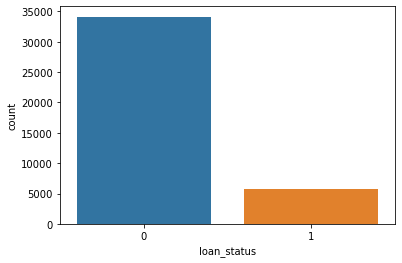

In [6]:
sns.countplot(full_data['loan_status'])

In [7]:
#sns.distplot(full_data['loan_amnt'])

In [8]:
#sns.distplot(full_data['int_rate'])

In [9]:
#sns.distplot(full_data['open_acc'])

In [10]:
#sns.distplot(full_data['dti'])

In [11]:
#sns.distplot(full_data['revol_util'])

In [12]:
#sns.distplot(full_data['revol_bal'])

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
full_data['trans_loan_amnt']=StandardScaler().fit_transform(full_data['loan_amnt'].values.reshape(-1,1))
full_data['trans_int_rate']=StandardScaler().fit_transform(full_data['int_rate'].values.reshape(-1,1))
full_data['trans_revol_util']=StandardScaler().fit_transform(full_data['revol_util'].values.reshape(-1,1))
full_data['trans_open_acc']=StandardScaler().fit_transform(full_data['open_acc'].values.reshape(-1,1))
full_data['trans_dti']=StandardScaler().fit_transform(full_data['dti'].values.reshape(-1,1))
full_data['trans_revol_bal']=StandardScaler().fit_transform(full_data['revol_bal'].values.reshape(-1,1))
full_data['trans_term']=StandardScaler().fit_transform(full_data['term'].values.reshape(-1,1))
full_data['trans_emp_length']=StandardScaler().fit_transform(full_data['emp_length'].values.reshape(-1,1))
full_data['trans_pub_rec']=StandardScaler().fit_transform(full_data['pub_rec'].values.reshape(-1,1))
full_data['trans_recoveries']=StandardScaler().fit_transform(full_data['recoveries'].values.reshape(-1,1))

new_data=full_data.drop(['loan_amnt','int_rate','open_acc','dti','revol_util','revol_bal','term','emp_length','pub_rec','recoveries'],axis=1)
new_data.head()

,loan_status,trans_loan_amnt,trans_int_rate,trans_revol_util,trans_open_acc,trans_dti,trans_revol_bal,trans_term,trans_emp_length,trans_pub_rec,trans_recoveries
0,1,3.184246,-0.004845,-1.509788,0.160451,-1.835489,-0.581964,1.649787,1.548029,-0.232043,-0.107082
1,0,-0.231947,0.801631,1.273982,-0.748652,0.654697,-0.499042,-0.606139,1.548029,-0.232043,-0.138630
2,1,-0.995567,-1.080145,-0.346948,0.160451,1.377944,-0.332946,-0.606139,-1.051346,-0.232043,-0.134844
3,1,0.156561,2.683407,1.027319,0.387727,-1.056838,-0.276951,1.649787,1.259210,-0.232043,0.444416
4,1,-0.968773,1.339281,1.203507,0.160451,-0.890626,-0.541446,1.649787,-0.184888,-0.232043,0.044992


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=new_data.drop('loan_status',axis=1)
y=new_data['loan_status']

In [17]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.10,random_state=1)

In [18]:
#logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,recall_score,make_scorer,precision_recall_curve

In [19]:
recall_score=make_scorer(recall_score)
logit_search=GridSearchCV(LogisticRegression(solver='liblinear'),param_grid={'C':[0.1,0.3,1,3,10,30,100]},scoring=recall_score)

In [20]:
logit_search.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.3, 1, 3, 10, 30, 100]},
             scoring=make_scorer(recall_score))

In [21]:
logit_search.best_params_

{'C': 100}

In [22]:
logit_predictions = logit_search.predict(x_test)

In [23]:
logit_prob = logit_search.predict_proba(X = x_test)[:,1]

In [24]:
print(classification_report(y_test, logit_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3393
           1       1.00      0.82      0.90       586

    accuracy                           0.97      3979
   macro avg       0.99      0.91      0.94      3979
weighted avg       0.97      0.97      0.97      3979



In [25]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [26]:
Decitree = DecisionTreeClassifier()

Decitree_param = {"criterion": ["gini", "entropy"],
               "max_depth": [3, None],
              "max_features": sp.stats.randint(1, 6),
              "min_samples_split": sp.stats.randint(2, 14),
              }

Decitree_search = RandomizedSearchCV(Decitree, param_distributions = Decitree_param,  scoring = recall_score)

In [27]:
Decitree_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ffab8748190>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ffab8748580>},
                   scoring=make_scorer(recall_score))

In [28]:
Decitree_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 4,
 'min_samples_split': 12}

In [29]:
Decitree_predictions = Decitree_search.predict(x_test)

In [30]:
Decitree_prob =  Decitree_search.predict_proba(x_test)[:,1]

In [31]:
print(classification_report(y_test, Decitree_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3393
           1       1.00      0.63      0.77       586

    accuracy                           0.95      3979
   macro avg       0.97      0.82      0.87      3979
weighted avg       0.95      0.95      0.94      3979



In [32]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
train_data = x_train.copy()
train_data['loan_status']= y_train
bad_data = train_data[train_data['loan_status']==1]
bad_size = len(bad_data)

In [35]:
minor_size = int(bad_size * 0.9)
non_bad_data = train_data[train_data['loan_status']==0].sample(n=minor_size, random_state=999,replace = True)
SMOTE_data = pd.concat([bad_data,non_bad_data])
SMOTE_x = SMOTE_data.drop('loan_status', axis = 1)
SMOTE_y = SMOTE_data['loan_status']

In [36]:
SMOTE_x_train = SMOTE_x
SMOTE_x_test = x_test
SMOTE_y_train = SMOTE_y
SMOTE_y_test = y_test

In [37]:
SMOTE_logit = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid = {'C':[0.1, 0.3, 1, 3, 10, 30, 100]}, scoring = recall_score)
SMOTE_logit.fit(SMOTE_x_train,SMOTE_y_train)
SMOTE_logit_predictions = SMOTE_logit.predict(SMOTE_x_test)
SMOTE_logit_prob = SMOTE_logit.predict_proba(SMOTE_x_test)[:,1]

print(classification_report(SMOTE_y_test, SMOTE_logit_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3393
           1       1.00      0.85      0.92       586

    accuracy                           0.98      3979
   macro avg       0.99      0.92      0.95      3979
weighted avg       0.98      0.98      0.98      3979



In [38]:
#model performance
#CAP curve function
#CAP curve
from matplotlib import cm
from scipy import integrate
def capcurve(y_values, y_proba):
    num_sum = np.sum(y_values)
    num_count = len(y_values)
    rate_val = float(num_sum) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_val,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)

    y_cap = np.c_[y_values,y_proba]
    y_cap_df = pd.DataFrame(data=y_cap)

    y_cap_df = y_cap_df.sort_values([1], ascending=False)
    y_cap_df = y_cap_df.reset_index(drop=True)

    yy = np.cumsum(y_cap_df[0]) / float(num_sum)
    yy = np.append([0], yy[0:num_count-1]) 

    percent = 0.5
    row_index = np.trunc(num_count * percent)
    row_index = row_index.astype(np.int32)

    sigma_perfect = 1 * xx[num_sum - 1 ] / 2 + (xx[num_count - 1] - xx[num_sum]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)

    gini_value = (sigma_model - sigma_random) / (sigma_perfect - sigma_random)

    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='b', label='User Model')
    ax.plot(xx,xx, linestyle='dashed', color='r', label='Random Model')
    
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.05)
    plt.title("CAP Curve. AR ="+str(np.round(gini_value,4)))
    plt.xlabel('% of the data')
    plt.ylabel('% of bad')
    plt.grid(True)
    plt.legend(loc = 'lower right')
    plt.savefig('CAP.png')
    plt.show()

In [39]:
#confusion matirx for logistic regression test
confusion_matrix(y_test,logit_predictions)

array([[3393,    0],
       [ 103,  483]])

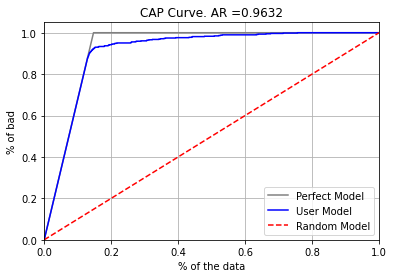

In [40]:
#logistic cap curve test
capcurve(y_values=y_test, y_proba=logit_prob)

In [41]:
#logi model result
print(classification_report(y_test, logit_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3393
           1       1.00      0.82      0.90       586

    accuracy                           0.97      3979
   macro avg       0.99      0.91      0.94      3979
weighted avg       0.97      0.97      0.97      3979



In [42]:
#logistic cm for train 
TRAIN_logit_predictions = logit_search.predict(x_train)
confusion_matrix(y_train,TRAIN_logit_predictions)

array([[30723,     0],
       [ 1061,  4023]])

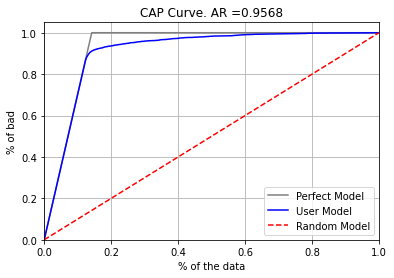

In [43]:
#logistic cap curve train
TRAIN_logit_prob = logit_search.predict_proba(X = x_train)[:,1]
capcurve(y_values=y_train, y_proba=TRAIN_logit_prob)

In [44]:
SMOTE_decitree = RandomizedSearchCV(Decitree, param_distributions = Decitree_param, scoring = recall_score)
SMOTE_decitree.fit(SMOTE_x_train, SMOTE_y_train)
SMOTE_decitree_predictions = SMOTE_decitree.predict(SMOTE_x_test)
SMOTE_decitree_prob = SMOTE_decitree.predict_proba(SMOTE_x_test)[:,1]

print(classification_report(SMOTE_y_test, SMOTE_decitree_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3393
           1       0.97      0.99      0.98       586

    accuracy                           0.99      3979
   macro avg       0.98      0.99      0.99      3979
weighted avg       0.99      0.99      0.99      3979



In [45]:
#decitree confusion matirx for decision tree
confusion_matrix(y_test,Decitree_predictions)

array([[3393,    0],
       [ 216,  370]])

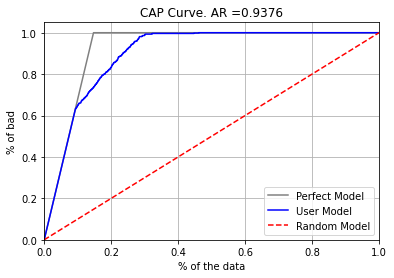

In [46]:
#decitree cap curve test
capcurve(y_values=y_test, y_proba=Decitree_prob)

In [47]:
#decitree model result
print(classification_report(y_test,Decitree_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3393
           1       1.00      0.63      0.77       586

    accuracy                           0.95      3979
   macro avg       0.97      0.82      0.87      3979
weighted avg       0.95      0.95      0.94      3979



In [48]:
#decitree for train data
Decitree_predictions = Decitree_search.predict(x_train)
confusion_matrix(y_train,Decitree_predictions)

array([[30723,     0],
       [ 1938,  3146]])

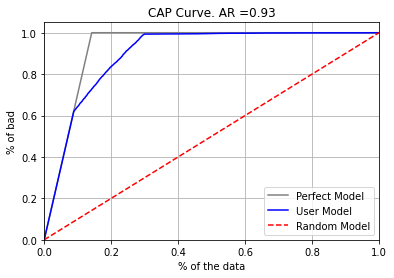

In [49]:
#decitree cap curve train
TRAIN_Decitree_prob = Decitree_search.predict_proba(X = x_train)[:,1]
capcurve(y_values=y_train, y_proba=TRAIN_Decitree_prob)

In [50]:
#random forest
from sklearn.ensemble import RandomForestClassifier
Random_forest= RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample', criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Random_forest.fit(SMOTE_x_train,SMOTE_y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=25,
                       min_samples_split=15, n_estimators=50, n_jobs=4,
                       random_state=0)

In [51]:
#random forest confusion matrix tet
Rf_predictions = Random_forest.predict(x_test)
confusion_matrix(y_test,Rf_predictions)

array([[3393,    0],
       [   7,  579]])

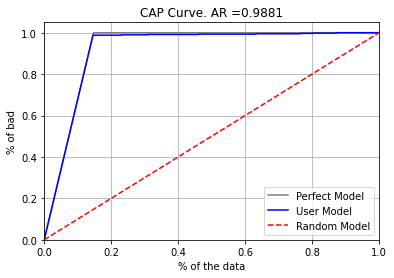

In [52]:
#random forst cap curve for test
Rf_proba = Random_forest.predict_proba(X=x_test)[:,1]
capcurve(y_values=y_test, y_proba=Rf_proba)

In [53]:
#random forest model result
print(classification_report(y_test,Rf_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3393
           1       1.00      0.99      0.99       586

    accuracy                           1.00      3979
   macro avg       1.00      0.99      1.00      3979
weighted avg       1.00      1.00      1.00      3979



In [54]:
#random forest confusion matrix train
TRAIN_Rf_predictions = Random_forest.predict(x_train)
confusion_matrix(y_train,TRAIN_Rf_predictions)

array([[30723,     0],
       [   52,  5032]])

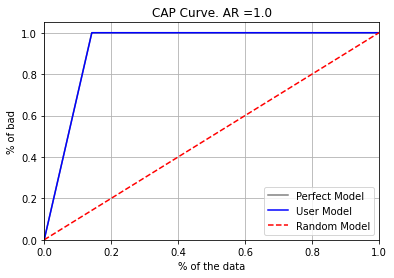

In [55]:
#random forest cap curve for train
rftrain_pred_proba = Random_forest.predict_proba(X=x_train)
capcurve(y_values=y_train, y_proba=rftrain_pred_proba[:,1])

In [56]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNeighbors = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=40, p=2,
 weights='uniform')
KNeighbors.fit(SMOTE_x_train,SMOTE_y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=40)

In [57]:
#KNN confusion matrix
KNN_predictions = KNeighbors.predict(x_test)
confusion_matrix(y_test,KNN_predictions)

array([[2708,  685],
       [ 229,  357]])

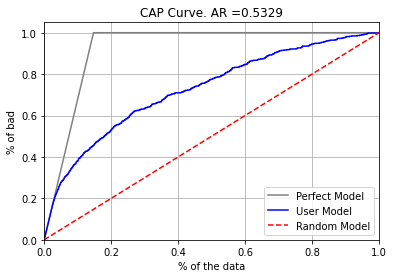

In [58]:
#KNN cap curve for test
knn_prob = KNeighbors.predict_proba(X=x_test)[:,1]
capcurve(y_values=y_test, y_proba=knn_prob)

In [59]:
#KNN model result
print(classification_report(y_test,KNN_predictions))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      3393
           1       0.34      0.61      0.44       586

    accuracy                           0.77      3979
   macro avg       0.63      0.70      0.65      3979
weighted avg       0.84      0.77      0.79      3979



In [60]:
#KNN confusion matrix train
TRAIN_KNN_predictions = KNeighbors.predict(x_train)
confusion_matrix(y_train,TRAIN_KNN_predictions)

array([[24345,  6378],
       [ 1930,  3154]])

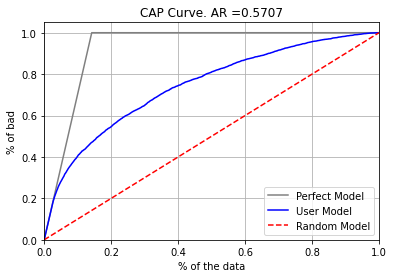

In [61]:
#KNN cap curve for train
TRAIN_knn_pred_proba = KNeighbors.predict_proba(X=x_train)
capcurve(y_values=y_train, y_proba=TRAIN_knn_pred_proba[:,1])

In [62]:
#neural network
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=200)
MLP.fit(SMOTE_x_train,SMOTE_y_train)

MLPClassifier(hidden_layer_sizes=200, max_iter=1000, random_state=1)

In [63]:
#MLP confusion matrix test
MLP_predictions = MLP.predict(x_test)
confusion_matrix(y_test,MLP_predictions)

array([[3308,   85],
       [  70,  516]])

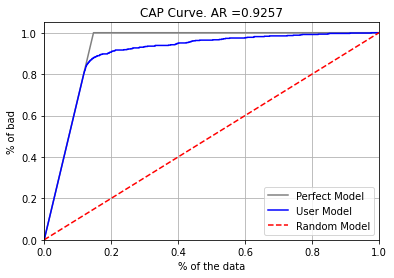

In [64]:
#MLP CAP curve test
MLP_pred_proba = MLP.predict_proba(X=x_test)[:,1]
capcurve(y_values=y_test, y_proba=MLP_pred_proba)

In [65]:
#MLP model result
print(classification_report(y_test,MLP_predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3393
           1       0.86      0.88      0.87       586

    accuracy                           0.96      3979
   macro avg       0.92      0.93      0.92      3979
weighted avg       0.96      0.96      0.96      3979



In [66]:
#MLP confusion matrix train
TRAIN_MLP_predicitions = MLP.predict(x_train)
confusion_matrix(y_train,TRAIN_MLP_predicitions)

array([[29984,   739],
       [  453,  4631]])

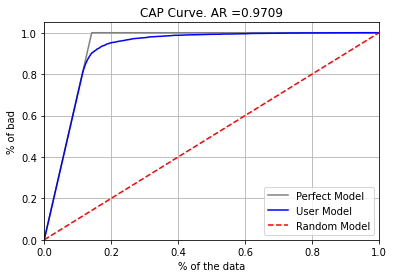

In [67]:
#MLP CAP curve train
TRAIN_MLP_pred_proba = MLP.predict_proba(X=x_train)
capcurve(y_values=y_train, y_proba=TRAIN_MLP_pred_proba[:,1])

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve

In [69]:
models = [
    {'label':'Logistic Regression - SMOTE',
     'fpr': roc_curve(SMOTE_y_test,SMOTE_logit_prob)[0],
     'tpr': roc_curve(SMOTE_y_test,SMOTE_logit_prob)[1],
     'auc': auc(roc_curve(SMOTE_y_test,SMOTE_logit_prob)[0], roc_curve(SMOTE_y_test,SMOTE_logit_prob)[1]),
     'precision': precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[0],
     'recall': precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[1],
     'pr-auc': auc(precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[1], precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[0])
    },
    {
     'label':'Decision Tree - SMOTE',
     'fpr': roc_curve(SMOTE_y_test,SMOTE_decitree_prob)[0],
     'tpr': roc_curve(SMOTE_y_test,SMOTE_decitree_prob)[1],
     'auc': auc(roc_curve(SMOTE_y_test,SMOTE_decitree_prob)[0], roc_curve(SMOTE_y_test,SMOTE_decitree_prob)[1]),
     'precision': precision_recall_curve(SMOTE_y_test,SMOTE_decitree_prob)[0],
     'recall': precision_recall_curve(SMOTE_y_test,SMOTE_decitree_prob)[1],
     'pr-auc': auc(precision_recall_curve(SMOTE_y_test,SMOTE_decitree_prob)[1], precision_recall_curve(SMOTE_y_test,SMOTE_decitree_prob)[0])  
    },
    {
     'label':'Random Forest',
     'fpr': roc_curve(y_test,Rf_proba)[0],
     'tpr': roc_curve(y_test,Rf_proba)[1],
     'auc': auc(roc_curve(y_test,Rf_proba)[0], roc_curve(y_test,Rf_proba)[1]),
     'precision': precision_recall_curve(y_test,Rf_proba)[0],
     'recall': precision_recall_curve(y_test,Rf_proba)[1],
     'pr-auc': auc(precision_recall_curve(y_test,Rf_proba)[1], precision_recall_curve(y_test,Rf_proba)[0])
    },
    {
     'label':'KNN',
     'fpr': roc_curve(y_test,knn_prob)[0],
     'tpr': roc_curve(y_test,knn_prob)[1],
     'auc': auc(roc_curve(y_test,knn_prob)[0], roc_curve(y_test,knn_prob)[1]),
     'precision': precision_recall_curve(y_test,knn_prob)[0],
     'recall': precision_recall_curve(y_test,knn_prob)[1],
     'pr-auc': auc(precision_recall_curve(y_test,knn_prob)[1], precision_recall_curve(y_test,knn_prob)[0])
    },
    {
     'label':'Neural Network',
     'fpr': roc_curve(y_test,MLP_pred_proba)[0],
     'tpr': roc_curve(y_test,MLP_pred_proba)[1],
     'auc': auc(roc_curve(y_test,MLP_pred_proba)[0], roc_curve(y_test,MLP_pred_proba)[1]),
     'precision': precision_recall_curve(y_test,MLP_pred_proba)[0],
     'recall': precision_recall_curve(y_test,MLP_pred_proba)[1],
     'pr-auc': auc(precision_recall_curve(y_test,MLP_pred_proba)[1], precision_recall_curve(y_test,MLP_pred_proba)[0])
    }
]

<Figure size 432x288 with 0 Axes>

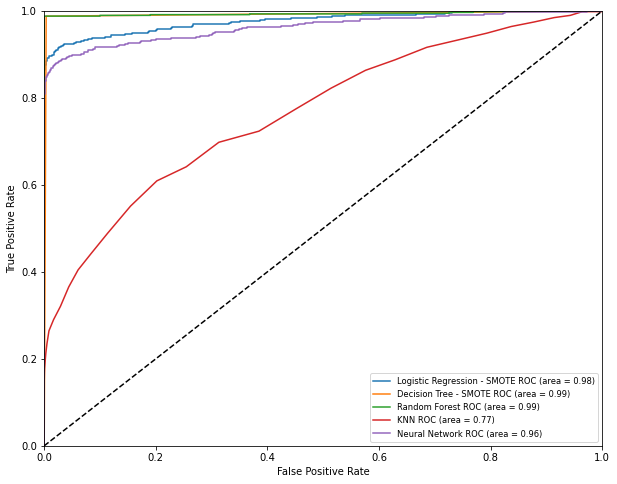

In [70]:

plt.clf()
plt.figure(figsize = (10,8))

for m in models:
    plt.plot(m['fpr'], m['tpr'], label = '%s ROC (area = %0.2f)' % (m['label'], m['auc']))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')

<Figure size 432x288 with 0 Axes>

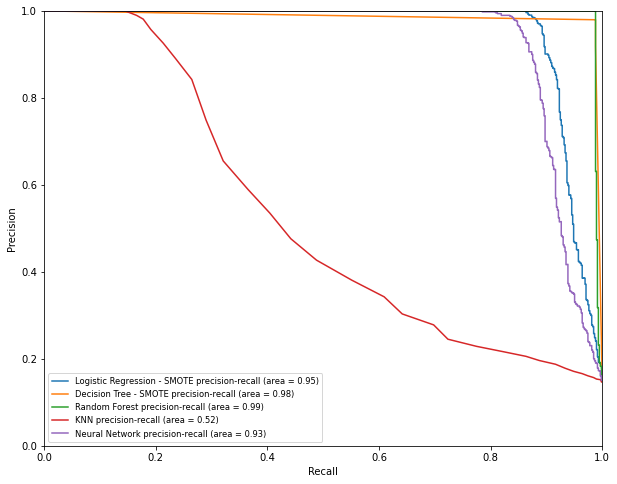

In [71]:
plt.clf()
plt.figure(figsize = (10,8))

for m in models:
    plt.plot(m['recall'], m['precision'], label = '%s precision-recall (area = %0.2f)' % (m['label'], m['pr-auc']))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 0, fontsize = 'small')

In [72]:
SMOTE_models = [
    {'label':'Logistic Regression - SMOTE',
     'fpr': roc_curve(SMOTE_y_test,SMOTE_logit_prob)[0],
     'tpr': roc_curve(SMOTE_y_test,SMOTE_logit_prob)[1],
     'auc': auc(roc_curve(SMOTE_y_test,SMOTE_logit_prob)[0], roc_curve(SMOTE_y_test,SMOTE_logit_prob)[1]),
     'precision': precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[0],
     'recall': precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[1],
     'pr-auc': auc(precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[1], precision_recall_curve(SMOTE_y_test,SMOTE_logit_prob)[0])
    },
    {
     'label':'Decision Tree - SMOTE',
     'fpr': roc_curve(SMOTE_y_test,SMOTE_decitree_prob)[0],
     'tpr': roc_curve(SMOTE_y_test,SMOTE_decitree_prob)[1],
     'auc': auc(roc_curve(SMOTE_y_test,SMOTE_decitree_prob)[0], roc_curve(SMOTE_y_test,SMOTE_decitree_prob)[1]),
     'precision': precision_recall_curve(SMOTE_y_test,SMOTE_decitree_prob)[0],
     'recall': precision_recall_curve(SMOTE_y_test,SMOTE_decitree_prob)[1],
     'pr-auc': auc(precision_recall_curve(SMOTE_y_test,SMOTE_decitree_prob)[1], precision_recall_curve(SMOTE_y_test,SMOTE_decitree_prob)[0])  
    }
]

In [73]:
whole_models = models + SMOTE_models

<Figure size 432x288 with 0 Axes>

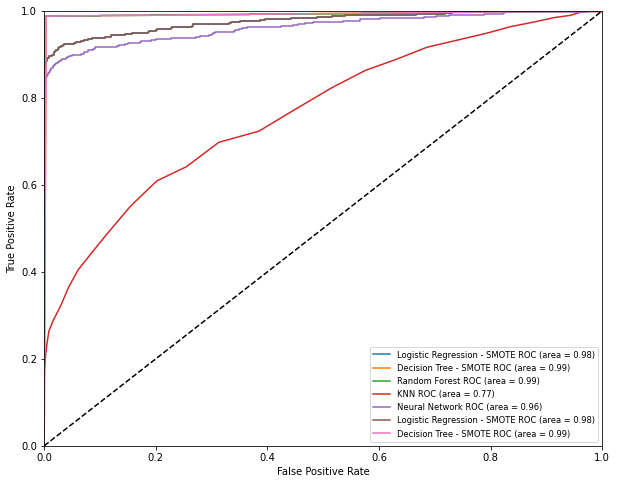

In [74]:
plt.clf()
plt.figure(figsize = (10,8))

for m in whole_models:
    plt.plot(m['fpr'], m['tpr'], label = '%s ROC (area = %0.2f)' % (m['label'], m['auc']))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')

<Figure size 432x288 with 0 Axes>

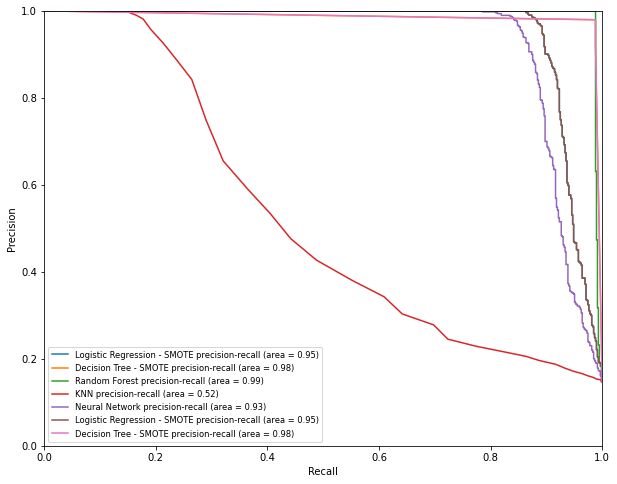

In [75]:
plt.clf()
plt.figure(figsize = (10,8))

for m in whole_models:
    plt.plot(m['recall'], m['precision'], label = '%s precision-recall (area = %0.2f)' % (m['label'], m['pr-auc']))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=0, fontsize='small')